In [116]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import math
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
import plotly.express as px

from gdeep.decision_boundary.decision_boundary_calculator import *
from gdeep.create_nets.sample_nn import Net
from gdeep.plotting.plot_decision_bdry import plot_activation_contours
from gdeep.create_data.tori import make_torus_point_cloud, Rotation
from gdeep.create_nets.utility import train_classification_nn
from gdeep.decision_boundary.compute_boundary import GradientFlow, UniformlySampledPoint
from gdeep.plotting import plot_decision_boundary

In [85]:
class ToFastaiNN(nn.Module):

    def __init__(self, nn: nn.Module):
        super().__init__()
        self.nn = nn
        
        
    def forward(self, x_cat, x_cont):
        return self.nn.forward(x_cont)
    
class ToPytorchNN(nn.Module):

    def __init__(self, nn: nn.Module):
        super().__init__()
        self.nn = nn
        
        
    def forward(self, x_cont):
        return self.nn.forward(x_cat=None, x_cont=x_cont)

In [61]:
class CircleNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.dim = 2

                
    def forward(self, x_cont):
        try:
            assert(x_cont.shape[-1]==2)
        except:
            raise ValueError(f'input has to be a {2}-dimensional vector')
        activation = 0.5*torch.exp(-torch.sum(x_cont**2, axis=-1)+1)-0.5
        return activation.reshape((-1,1))
    
    def return_input_dim(self):
        return 2

circle_detect_nn = CircleNN()


plot_activation_contours(ToFastaiNN(circle_detect_nn), boundary_tuple=((-10,10),(-10,10)))


In [62]:
class PeriodicNeuralNetworkMaker(nn.Module):

    def __init__(self, nn: nn.Module, boundary_list):
        super().__init__()
        self.nn = nn
        self.interval_length = torch.tensor([[b-a for a, b in boundary_list]])
        self.left_interval_bound = torch.tensor([[a for a, b in boundary_list]])
        
        
    def forward(self, x_cont):
        x_cont = torch.abs(
                    torch.remainder(
                        x_cont-self.left_interval_bound, 2.*self.interval_length
                    )-self.interval_length
                    )+ self.left_interval_bound
        x_cont = self.nn.forward(x_cont)
        return x_cont
        

periodic_circle_nn = PeriodicNeuralNetworkMaker(circle_detect_nn, [(0,0.5),(-0.5,0.5)])


plot_activation_contours(ToFastaiNN(periodic_circle_nn), boundary_tuple=((-10,10),(-10,10)))

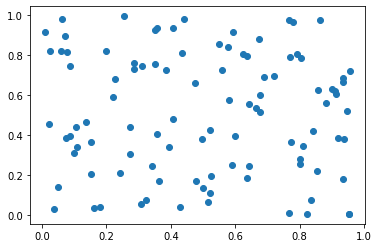

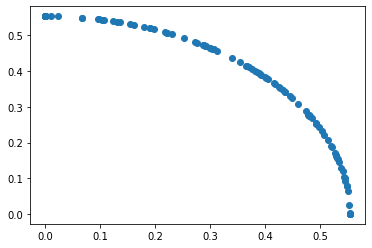

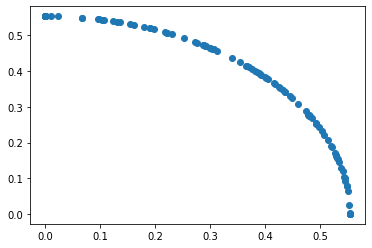

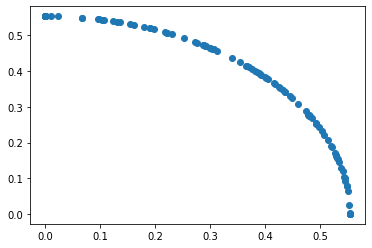

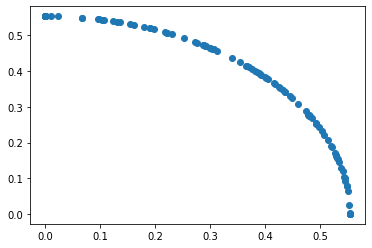

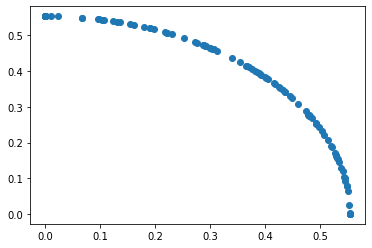

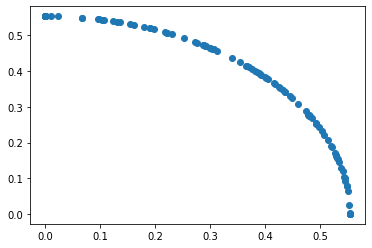

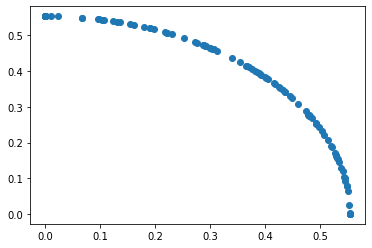

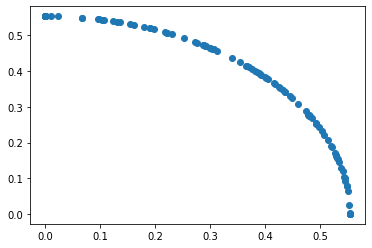

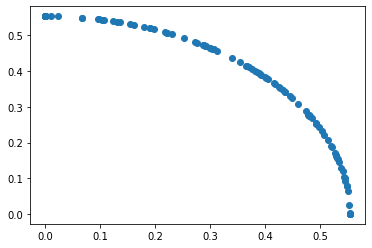

In [70]:
import matplotlib.pyplot as plt

g = GradientFlowDecisionBoundaryCalculator(
            model=circle_detect_nn,
            initial_points=torch.rand((100,2)),
            optimizer=lambda params: torch.optim.Adam(params)
)
for i in range(100000):
    g.step()
    if i%10000==0:
        plt.scatter(g.return_decision_boundary().detach().numpy()[:,0],g.return_decision_boundary().detach().numpy()[:,1])
        plt.show()


In [18]:
optimizer=lambda params: nn.optimizer.Adam(params)
optimizer([torch.tensor([[0.,0.],[1.,0.]])])

AttributeError: module 'torch.nn' has no attribute 'optimizer'

In [47]:
torch.fmod(torch.tensor([[-1.15,1.5],[0.5,2.5]]),torch.tensor([1.,1.])).size()

torch.Size([2, 2])

In [53]:
torch.rand((10), dtype = torch.float64, device='cpu') + 0.5

tensor([1.0173, 0.7853, 0.6810, 0.8472, 1.2805, 1.1920, 1.2462, 0.6449, 0.9380,
        1.1976], dtype=torch.float64)

In [ ]:
torch.tensor(0.5, dtype=# Plot data sets
df_tori = {}

config = 'ent'
df_tori[config] = pd.DataFrame(tori_point_cloud[config], columns = ["x", "y", "z"])
fig = px.scatter_3d(df_tori[config], x="x", y="y", z="z",\
                    color=tori_labels[config], title="Tori "+config+"angled")
fig.show())

In [ ]:
gf_decision_boundary_calc = GradientFlowDecisionBoundaryCalculator()

In [33]:
func = lambda x:torch.sum(x**2)

x = torch.tensor([[-1.15,1.5],[0.5,2.5]], requires_grad=True)
y = func(x)

y.backward()
x.grad

tensor([[-2.3000,  3.0000],
        [ 1.0000,  5.0000]])

In [60]:
class AbsoluteDifference(nn.Module):
    def forward(self, x):
        #x.shape = (*,2)
        x = x.reshape((x.shape[0],1,x.shape[-1]))
        return torch.abs(F.conv1d(x, weight=torch.tensor([[[1.,-1.]]])).reshape((-1)))
absolute_difference = AbsoluteDifference()
diff_model = nn.Sequential(model, absolute_difference)

In [34]:
type(absolute_difference.forward(torch.tensor([[0.6,0.4],[0.5,0.5]])))

NameError: name 'absolute_difference' is not defined

In [35]:
model_l1.forward(torch.tensor([1,1]),torch.tensor([.5,.5]))

tensor(0.5000)

In [37]:
type(model_l1)

torch.nn.modules.loss.L1Loss

In [52]:
x = torch.tensor([[0.6,0.4],[0.5,0.5]]).reshape((x.shape[0],1,x.shape[-1]))
F.conv1d(x, weight=torch.tensor([[[1.,-1.]]]))

tensor([[[0.2000]],

        [[0.0000]]])

In [51]:
x.shape

torch.Size([2, 1, 2])

In [38]:
hash()

TypeError: unhashable type: 'dict'

In [57]:
if not 1 in [1, 2]:
            raise(ImportWarning)

In [80]:
torus_point_cloud = {'ent': {0: {}, 1: {}}, 'unent': {0: {}, 1: {}}}
torus_labels = {'ent': {0: {}, 1: {}}, 'unent': {0: {}, 1: {}}}

# Generate torus point cloud for unentangled tori
torus_point_cloud['unent'][0], torus_labels['unent'][0] = make_torus_point_cloud(0, 50, 0.0,\
    Rotation(1,2,math.pi/2), np.array([[0,0,0]]), radius=.3)
torus_point_cloud['unent'][1], torus_labels['unent'][1]  = make_torus_point_cloud(1, 50, 0.0,\
    Rotation(1,2,0), np.array([[6,0,0]]), radius=.3)

# Generate torus point cloud for unentangled tori
torus_point_cloud['ent'][0], torus_labels['ent'][0] = make_torus_point_cloud(0, 50, 0.0,\
    Rotation(1,2,math.pi/2), np.array([[0,0,0]]), radius=.3)
torus_point_cloud['ent'][1], torus_labels['ent'][1]  = make_torus_point_cloud(1, 50, 0.0,\
    Rotation(1,2,0), np.array([[2,0,0]]), radius=.3)


# Concatenate torus point clouds
tori_point_cloud = {}
tori_labels = {}

for config in ['ent', 'unent']:
    tori_point_cloud[config] = np.concatenate((torus_point_cloud[config][0],\
                                torus_point_cloud[config][1]), axis=0)
    tori_labels[config] = np.concatenate((torus_labels[config][0],\
                                torus_labels[config][1]), axis=0)

In [81]:
# Plot data sets
df_tori = {}

config = 'ent'
df_tori[config] = pd.DataFrame(tori_point_cloud[config], columns = ["x", "y", "z"])
fig = px.scatter_3d(df_tori[config], x="x", y="y", z="z",\
                    color=tori_labels[config], title="Tori "+config+"angled")
fig.show()

In [98]:
# Define neural network architecture
tori_detect_nn = {}
net1 = Net(0, [3,20,20,20,20])
net2 = Net(0, [3,20,20,20,10])
tori_detect_nn['unent'] = net1
tori_detect_nn['ent'] = net2

# Print the architecture of both neural nets
for config in ['ent', 'unent']:
    print('Architecture of Neural Net for ' + config + 'angled:\n', tori_detect_nn[config])

# Train neural neural nets on data sets
for config in ['ent', 'unent']:
    print('Training of Neural Net for ' + config + 'angled')
    train_classification_nn(tori_detect_nn[config], tori_point_cloud[config], tori_labels[config], n_epochs=10)

Architecture of Neural Net for entangled:
 Net(
  (layer0): Linear(in_features=3, out_features=20, bias=True)
  (layer1): Linear(in_features=20, out_features=20, bias=True)
  (layer2): Linear(in_features=20, out_features=20, bias=True)
  (layer3): Linear(in_features=20, out_features=10, bias=True)
  (layer4): Linear(in_features=10, out_features=2, bias=True)
)
Architecture of Neural Net for unentangled:
 Net(
  (layer0): Linear(in_features=3, out_features=20, bias=True)
  (layer1): Linear(in_features=20, out_features=20, bias=True)
  (layer2): Linear(in_features=20, out_features=20, bias=True)
  (layer3): Linear(in_features=20, out_features=20, bias=True)
  (layer4): Linear(in_features=20, out_features=2, bias=True)
)
Training of Neural Net for entangled


Training of Neural Net for unentangled


In [192]:
# Apply gradient flow to detect decision boundary
tori_detect_nn_pytorch ={}
for config in ['ent', 'unent']:
    tori_detect_nn_pytorch[config] = ToPytorchNN(tori_detect_nn[config])

n_samples = 100000

boundary_tuple = {}

#boundary_tuple['ent']   = [(-2, 4), (-2, 2), (-2, 2)]
boundary_tuple['ent']   = [(-10, 10), (-10, 10), (-10, 10)]
boundary_tuple['unent'] = [(-3, 7), (-2, 2), (-2, 2)]

sample_points_generator = {}
sample_points = {}
sample_points_boundary = {}

for config in ['ent', 'unent']:
    sample_points_generator[config] = UniformlySampledPoint(boundary_tuple[config], n_samples=n_samples)
    sample_points[config] = torch.from_numpy(sample_points_generator[config]()).float()


    g = GradientFlowDecisionBoundaryCalculator(
                model=tori_detect_nn_pytorch[config],
                initial_points=sample_points[config],
                optimizer=lambda params: torch.optim.Adam(params)
    )
    for i in range(1000):
        g.step()
        
    sample_points_boundary[config] = g.return_decision_boundary().detach().numpy()

In [191]:
sample_points_boundary_filter = {}
for config in ['ent','unent']:
    function_val = tori_detect_nn_pytorch[config](g.return_decision_boundary()).detach().numpy()[:,0]

    sample_points_boundary_filter[config] = sample_points_boundary[config][np.stack((function_val>0.49,function_val<0.51)).all(axis=0)]

for config in ['ent','unent']:
    fig = plot_decision_boundary(tori_point_cloud[config], tori_labels[config], sample_points_boundary_filter[config], n_components=3, show=False)
    fig.update_layout(
        title_text='Decision boundary of neural network for entangled tori'
    )
    fig.show()

KeyError: 'unent'

In [190]:
fig.write_html("images/file.html")

In [184]:
sample_points_boundary_filter[config].shape

(10000, 3)

In [186]:
np.stack((function_val>0.49,function_val<0.51)).any(axis=0).shape

(10000,)

In [172]:
np.stack((function_val>0.48,function_val<0.52)).any(axis=0)

array([ True,  True,  True, ...,  True,  True,  True])

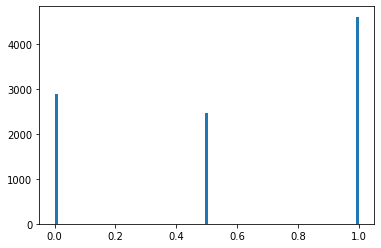

In [181]:
import matplotlib.pyplot as plt

config = 'ent'
function_val = tori_detect_nn_pytorch[config](g.return_decision_boundary()).detach().numpy()[:,0]

hist, _, _ =plt.hist(function_val, bins=101)
plt.show()

In [175]:
function_val

array([0.5       , 0.5000006 , 0.4999997 , ..., 0.5000007 , 0.5000006 ,
       0.49999976], dtype=float32)

In [150]:
hist[490:515].astype(int)

array([   1,    0,    0,    0,    1,    0,    1,    0,    1,    2, 9806,
          0,    0,    0,    1,    0,    0,    0,    0,    0,    1,    1,
          0,    0,    0])

In [176]:
hist

array([ 16.,   0.,   0., ...,   0.,   0., 195.])

In [196]:
torch.topk(torch.Tensor([[1,2,3],[1,3,2],[-1,0,1]]), 2).values

tensor([[3., 2.],
        [3., 2.],
        [1., 0.]])